## **Data Cleaning**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cic = pd.read_csv("Car_Insurance_Claim.csv")
cic.drop(columns=['Unnamed: 0', 'ID'], inplace=True)
to_num= cic.columns[[6,7,9,10,11,12,14,15,16,17]]
cic[to_num] = cic[to_num].apply(pd.to_numeric, errors='coerce')
to_replace = [col for col in cic.columns if col != 'EDUCATION']
cic['EDUCATION'] = cic['EDUCATION'].replace('none', 'unknown')
cic[to_replace] = cic[to_replace].replace('none', np.nan)
cic = cic.dropna(subset=[col for col in cic.columns if col not in ['ANNUAL_MILEAGE', 'CREDIT_SCORE']])
to_bool = ['OUTCOME','CHILDREN', 'MARRIED', 'VEHICLE_OWNERSHIP']
cic[to_bool] = cic[to_bool].astype(bool)
mean_mileage = cic.groupby(['VEHICLE_YEAR', 'VEHICLE_TYPE'])['ANNUAL_MILEAGE'].transform(lambda x: int(np.round(x.mean(), -3)))
cic['ANNUAL_MILEAGE'] = cic['ANNUAL_MILEAGE'].fillna(mean_mileage)
mean_credit = cic.groupby(['AGE', 'GENDER','INCOME'])['CREDIT_SCORE'].transform(lambda x: (x.mean()))
cic['CREDIT_SCORE'] = cic['CREDIT_SCORE'].fillna(mean_credit)
to_int = ['POSTAL_CODE','ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS','PAST_ACCIDENTS' ]
cic[to_int] = cic[to_int].astype(int)


print(cic.sample(5),"\n", cic.shape, '\n' )
print(cic.isnull().sum())





        AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION        INCOME  \
9127  40-64    male  majority             20-29y      unknown  middle class   
3269  26-39    male  majority               0-9y  high school  middle class   
3440  26-39    male  majority               0-9y   university   upper class   
2285  16-25  female  majority               0-9y  high school  middle class   
9138    65+    male  majority             10-19y      unknown  middle class   

      CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
9127      0.474000               True  before 2015     True      True   
3269      0.506734               True  before 2015    False     False   
3440      0.619274               True  before 2015    False     False   
2285      0.474763               True  before 2015    False     False   
9138      0.592371               True  before 2015     True      True   

      POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
9127     

## **Descriptive Statistics**

In [25]:
print(cic.describe(include='all'),'\n')
for column in cic.columns:
    print(f"Value counts for column: {column}")
    print(cic[column].value_counts(dropna=False), "\n")

          AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION       INCOME  \
count    8662    8662      8662               8662         8662         8662   
unique      4       2         2                  4            3            4   
top     26-39  female  majority               0-9y  high school  upper class   
freq     2675    4351      7823               3072         3579         3733   
mean      NaN     NaN       NaN                NaN          NaN          NaN   
std       NaN     NaN       NaN                NaN          NaN          NaN   
min       NaN     NaN       NaN                NaN          NaN          NaN   
25%       NaN     NaN       NaN                NaN          NaN          NaN   
50%       NaN     NaN       NaN                NaN          NaN          NaN   
75%       NaN     NaN       NaN                NaN          NaN          NaN   
max       NaN     NaN       NaN                NaN          NaN          NaN   

        CREDIT_SCORE VEHICLE_OWNERSHIP 

In [26]:
cic_stat = cic.copy()


def success_rate(df, column):
    return df.groupby(column, observed=True)['OUTCOME'].mean() * 100


def categorize_column(df, column_name, bins, labels, new_column_name):
    if new_column_name not in df.columns and column_name in df.columns:
        insert_index = df.columns.get_loc(column_name) + 1
        df.insert(insert_index, new_column_name, pd.cut(df[column_name], bins=bins, labels=labels))
        df = df.drop(columns=[column_name])
    return df


columns_to_categorize = [
    {
        'column_name': 'CREDIT_SCORE',
        'bins': [-1, 0.25, 0.5, 0.75, float('inf')],
        'labels': ['Low (<0.25)', 'Medium (0.25-0.5)', 'High (0.5-0.75)', 'Very High (>0.75)'],
        'new_column_name': 'CREDIT_SCORE_GROUP'
    },
    {
        'column_name': 'ANNUAL_MILEAGE',
        'bins': [-1, 10000, 15000, float('inf')],
        'labels': ['Low (<10k)', 'Medium (10k-15k)', 'High (>15k)'],
        'new_column_name': 'ANNUAL_MILEAGE_GROUP'
    },
    {
        'column_name': 'SPEEDING_VIOLATIONS',
        'bins': [-1, 3, 8, float('inf')],
        'labels': ['Low (<3)', 'Medium (3-8)', 'High (>8)'],
        'new_column_name': 'SPEEDING_VIOLATIONS_GROUP'
    },
    {
        'column_name': 'DUIS',
        'bins': [-1, 1, 3, float('inf')],
        'labels': ['Low (<1)', 'Medium (1-3)', 'High (>3)'],
        'new_column_name': 'DUIS_GROUP'
    },
    {
        'column_name': 'PAST_ACCIDENTS',
        'bins': [-1, 2, 5, float('inf')],
        'labels': ['Low (<2)', 'Medium (2-5)', 'High (>5)'],
        'new_column_name': 'PAST_ACCIDENTS_GROUP'
    }
]



for params in columns_to_categorize:
    cic_stat = categorize_column(df=cic_stat, **params)

print(cic_stat.sample(5))
for col in cic_stat:
    print(f"Success rate for {col}(%):\n", success_rate(cic_stat, col), "\n")







        AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION         INCOME  \
955   16-25    male  majority               0-9y      unknown        poverty   
2555  16-25    male  majority               0-9y      unknown  working class   
7115  40-64  female  minority             20-29y  high school   middle class   
4232    65+  female  majority               30y+  high school    upper class   
4792  40-64    male  majority             20-29y   university   middle class   

     CREDIT_SCORE_GROUP  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
955   Medium (0.25-0.5)              False   after 2015    False      True   
2555        Low (<0.25)              False  before 2015    False     False   
7115    High (0.5-0.75)              False  before 2015    False      True   
4232    High (0.5-0.75)               True   after 2015     True     False   
4792    High (0.5-0.75)              False  before 2015    False      True   

      POSTAL_CODE ANNUAL_MILEAGE_GROUP VEHICLE_TYP

## **Data Visualization**

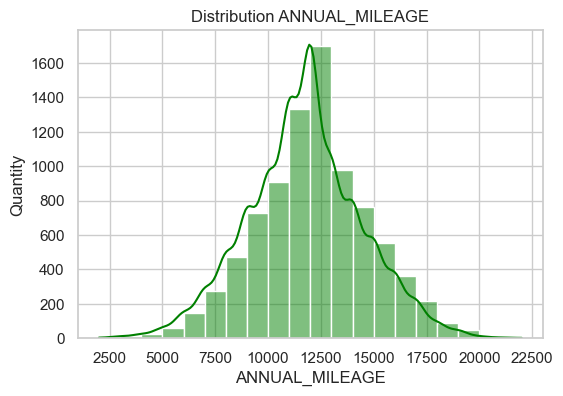

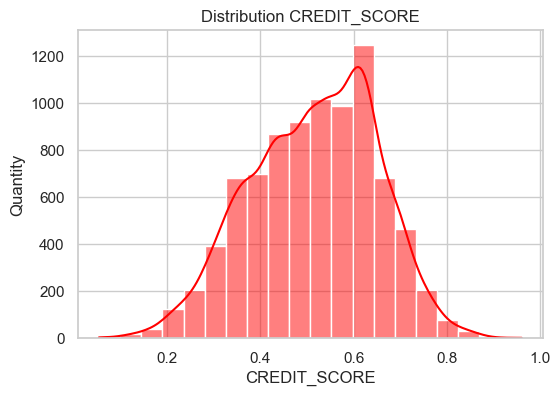

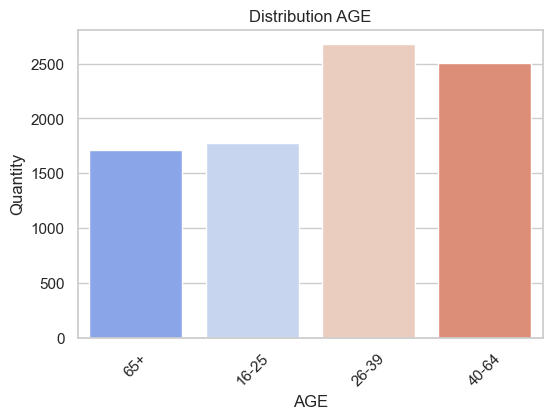

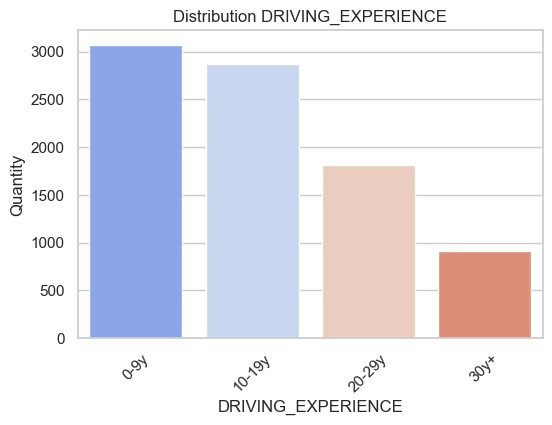

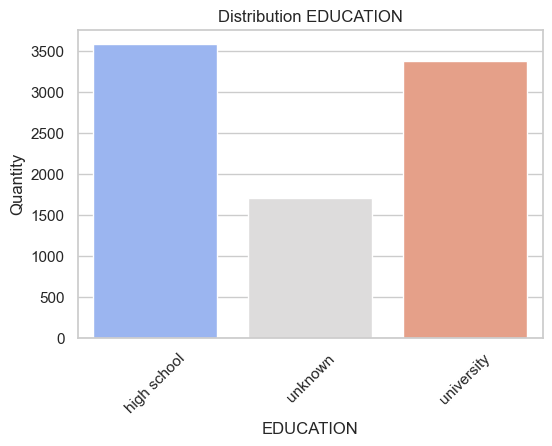

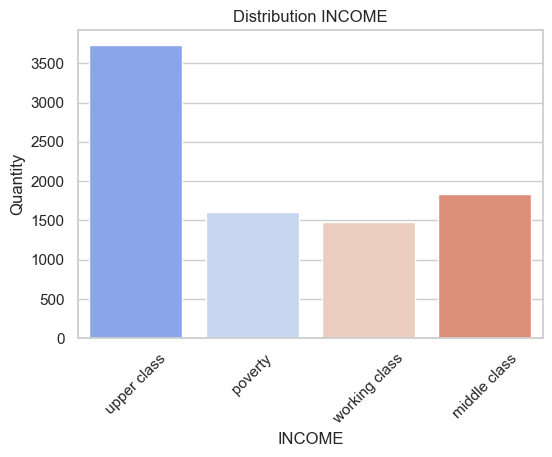

In [27]:
def plot_variable(df, column, bins=20, color='blue'):
  
    plt.figure(figsize=(6, 4))
    
    if df[column].dtype == 'object' or df[column].nunique() < 10:  
        sns.countplot(x=df[column], palette='coolwarm', hue=df[column])
        plt.xticks(rotation=45)  
    else:  
        sns.histplot(df[column], bins=bins, kde=True, color=color)

    plt.title(f'Distribution {column}')
    plt.xlabel(column)
    plt.ylabel('Quantity')
    plt.show()

plot_variable(cic, 'ANNUAL_MILEAGE', color='green')
plot_variable(cic, 'CREDIT_SCORE', color='red')
plot_variable(cic, 'AGE', color='blue')
plot_variable(cic, 'DRIVING_EXPERIENCE', color='purple')
plot_variable(cic, 'EDUCATION', color='orange')
plot_variable(cic, 'INCOME', color='green')


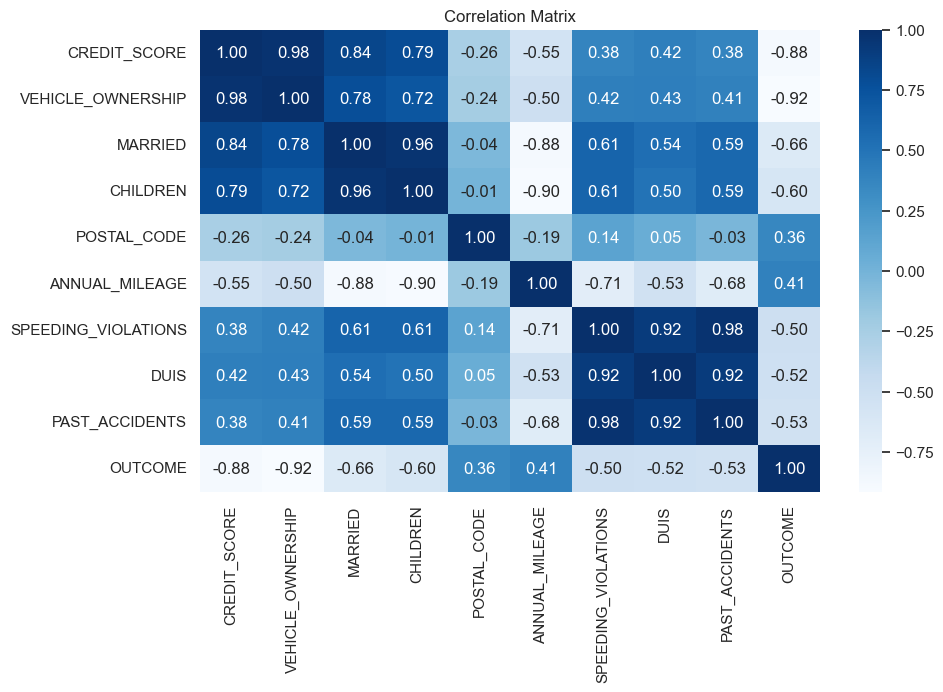

In [28]:
corr_df = cic.iloc[:,[6,7,9,10,11,12,14,15,16,17]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(method='spearman', numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

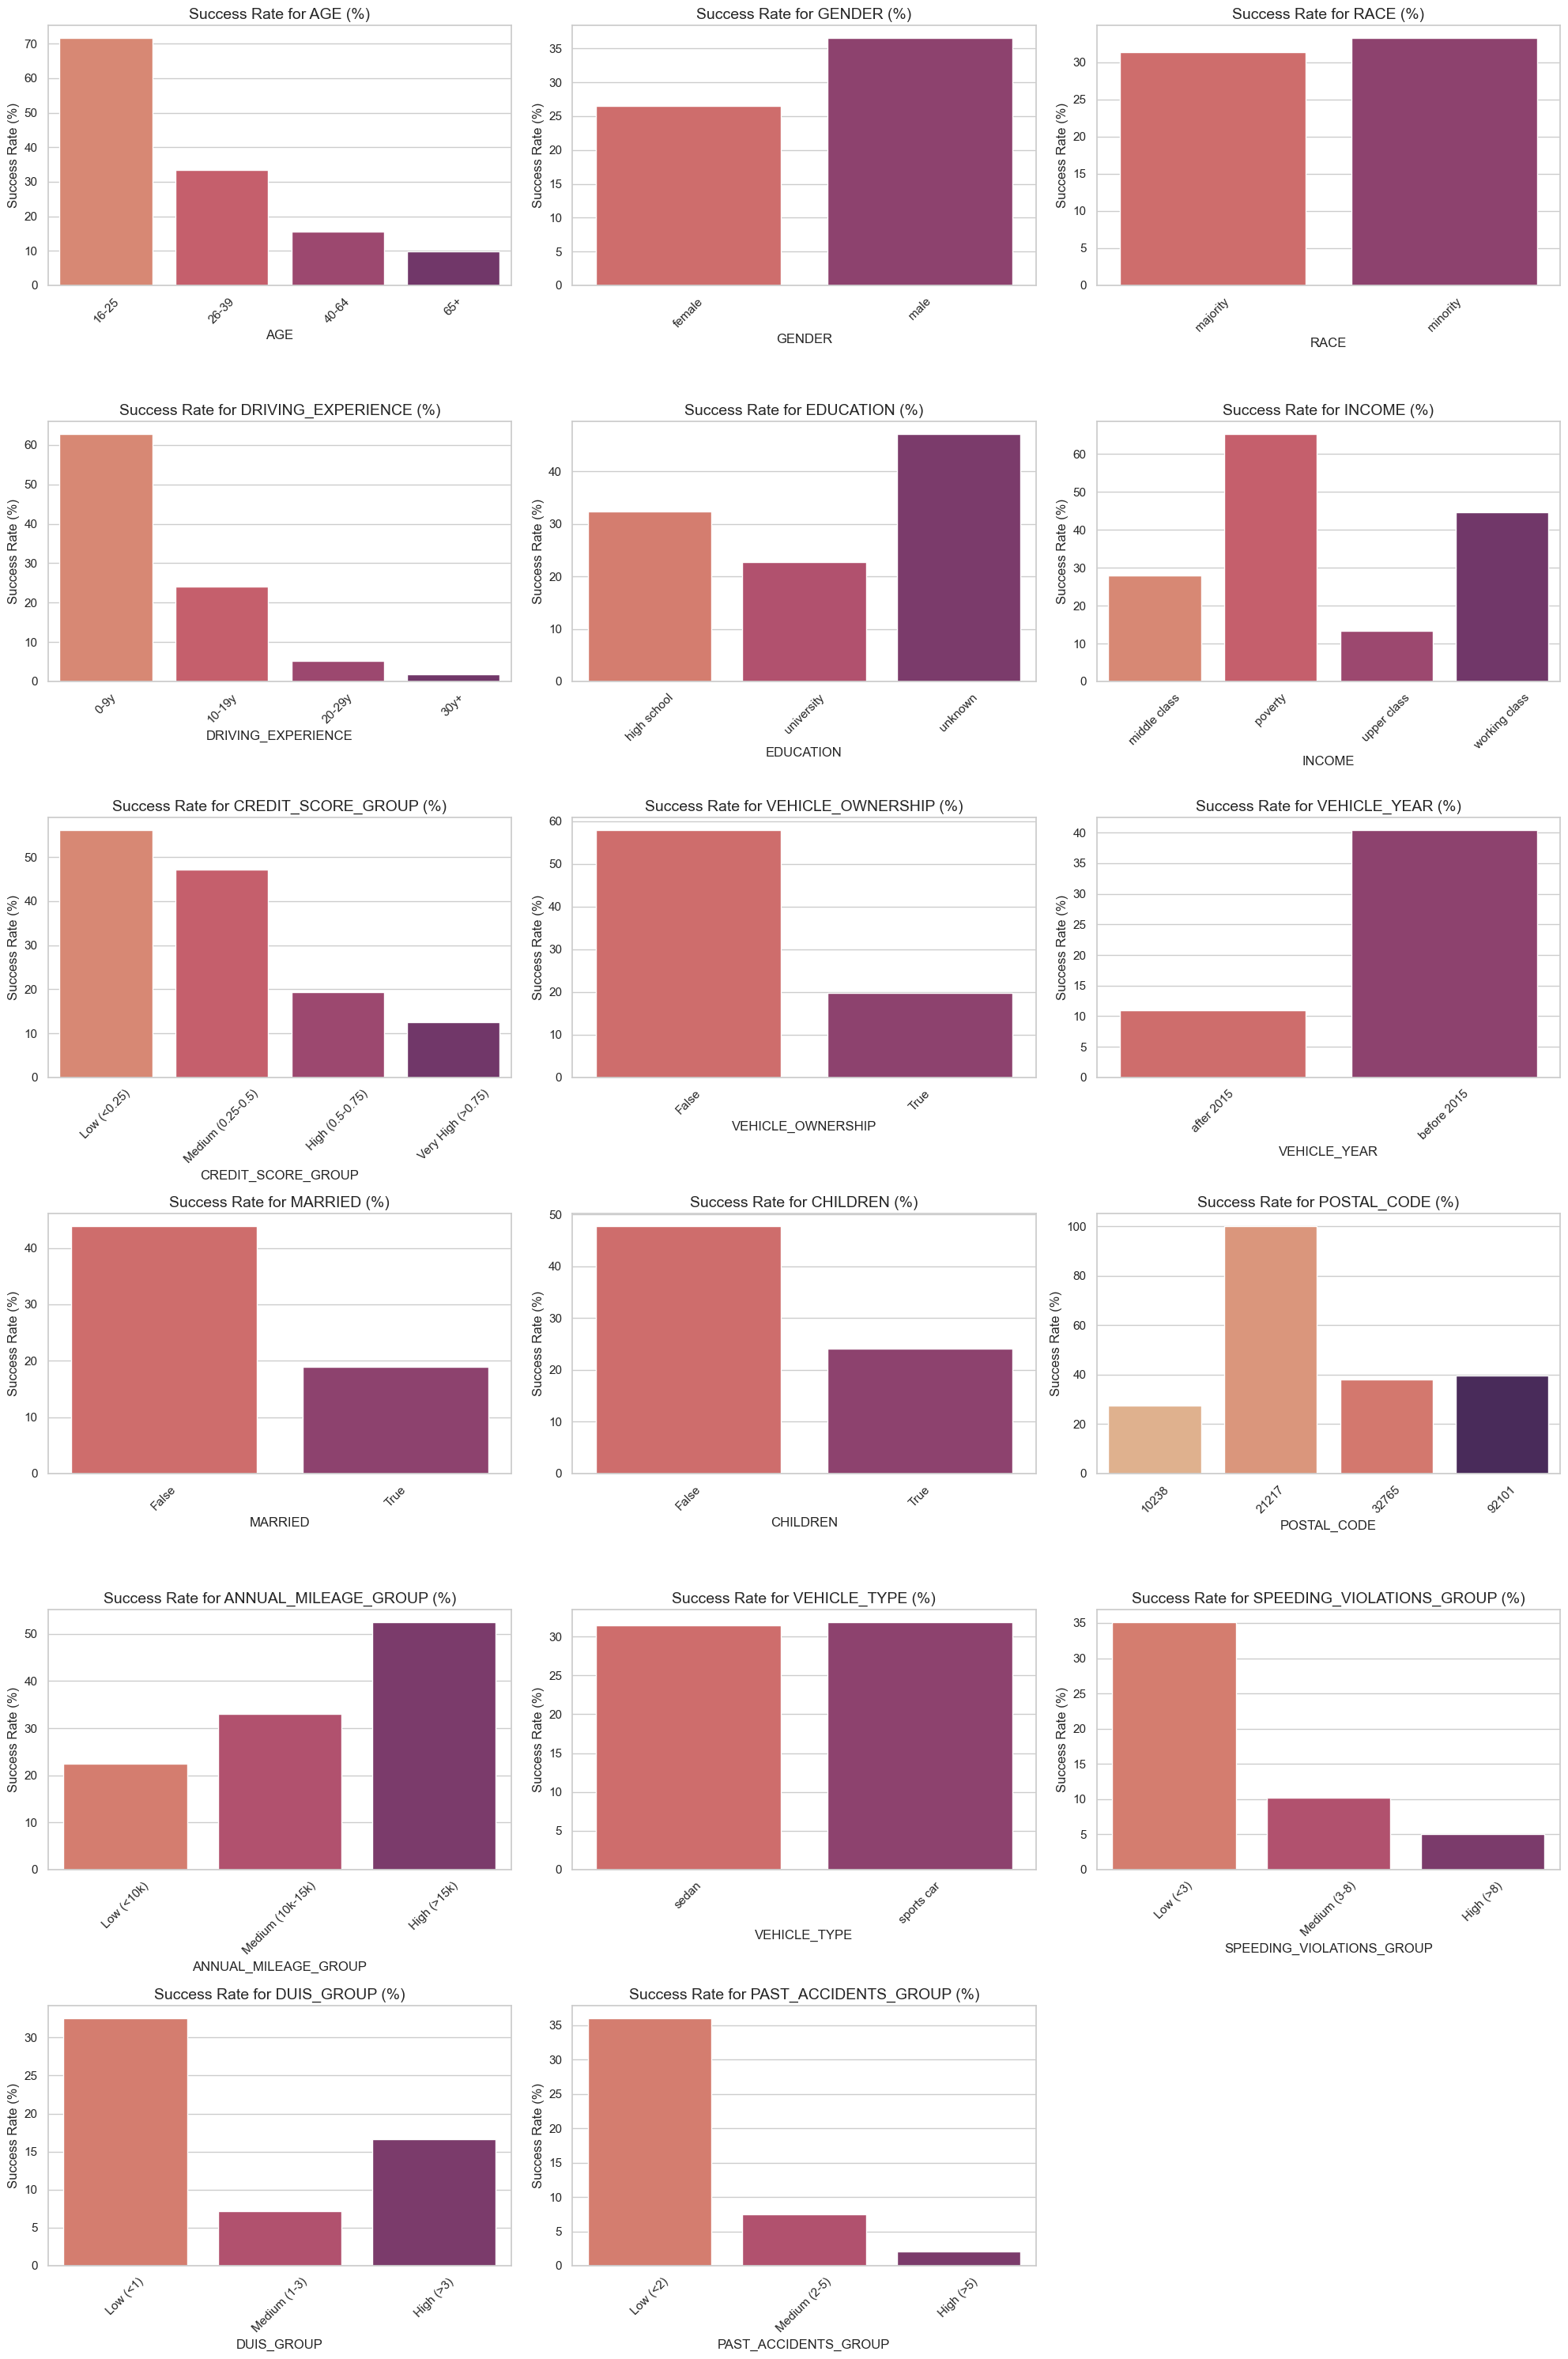

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (20, 30)  

num_cols = len(cic_stat.columns) - 1
num_rows = (num_cols + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  


def visualize_success_rate_on_axes(df, column, ax):
    success_rates = success_rate(df, column)
    
    sns.barplot(
        x=success_rates.index,
        y=success_rates.values,
        palette="flare",
        ax=ax,
        hue=success_rates.index,  
        legend=False  
    )
    
    ax.set_title(f'Success Rate for {column} (%)', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Success Rate (%)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)


for i, col in enumerate([col for col in cic_stat.columns if col != 'OUTCOME']):
    visualize_success_rate_on_axes(cic_stat, col, axes[i])

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## **Conclusions**
Based on the provided charts and correlation matrix, several conclusions can be drawn regarding the factors influencing the success of insurance claims.

Younger drivers under 25 have a higher success rate for claims, whereas older drivers (55+) have significantly lower approval rates. Women are more likely to receive claim approvals compared to men. Individuals with unknown education tend to have a higher success rate. Married individuals and those with children generally have a lower success rate than their unmarried and childless counterparts.

Lower-income individuals have a higher claim approval rate. People with a lower credit score (<0.2) are more likely to have successful claims compared to those with a higher credit score. Certain postal codes, such as 9230, show significantly higher success rates, indicating possible regional influences.

Vehicle ownership plays a crucial role, as those who own their cars have a much higher success rate for claims. Cars manufactured after 2015 also have a higher approval rate. Regular and sports cars show similar success rates in claims.

Driving experience impacts claim approval, with drivers having less than five years of experience showing higher success rates. Those with a higher annual mileage tend to have lower claim success rates. Traffic violations significantly affect claim outcomes, as a high number of speeding violations, DUI offenses, and past accidents all contribute to a lower likelihood of claim approval.

The correlation matrix reveals strong negative correlations between credit score and claim success (-0.88), as well as between vehicle ownership and claim success (-0.92). This suggests that people with lower credit scores and those who own vehicles are more likely to receive claim approvals. Negative correlations also exist between past accidents (-0.53), DUI offenses (-0.52), and speeding violations (-0.50) with claim success, confirming that drivers with a history of violations have a lower chance of getting their claims approved.

For insurance companies, these insights can help optimize risk assessment criteria, as younger drivers, vehicle owners, and those with lower credit scores tend to have higher claim success rates. Risky driving behaviors such as DUI, speeding, and previous accidents strongly influence claim denials, indicating that these factors should be carefully considered. Certain postal codes demonstrate notably higher success rates, suggesting the importance of regional risk assessments. These conclusions can aid in refining company policies for loan approval and risk management in insurance claims.